<a href="https://colab.research.google.com/github/Pranjalsbl/Portfolio_Optimizer/blob/main/Update_Python_Code_for_efficient_frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Description: This program attempts to optimize a users portfolio using the efficient frontier


In [2]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 4.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf
import numpy as np

In [4]:
df=yf.download(['AAPL','CAT'],start="2000-12-01",end="2020-12-01")

[*********************100%***********************]  2 of 2 completed


In [5]:
df

Adj Close                   Close  ...        Open      Volume         
                  AAPL         CAT        AAPL  ...         CAT        AAPL      CAT
Date                                            ...                                 
2000-12-01    0.261229   11.739699    0.304688  ...   19.750000   385705600  3003600
2000-12-04    0.255487   12.497102    0.297991  ...   20.375000   371520800  6023200
2000-12-05    0.260271   12.515135    0.303571  ...   21.656250   613978400  5893000
2000-12-06    0.219125   11.992167    0.255580  ...   21.343750  1374464000  3086800
2000-12-07    0.219125   11.992167    0.255580  ...   20.781250   408917600  2262800
...                ...         ...         ...  ...         ...         ...      ...
2020-11-23  113.152435  171.203522  113.849998  ...  173.759995   127959300  2403500
2020-11-24  114.464355  173.280136  115.169998  ...  176.250000   113874200  3447000
2020-11-25  115.319084  171.056595  116.029999  ...  176.460007    76499200  2506400
2020-11-27  115.875641  171.497375  116.589996  ...  174.410004    46691300   976900
2020-11-30  118.320580  170.037857  119.050003  ...  173.610001   169410200  2382600

[5030 rows x 12 columns]

In [6]:
df=np.log(1+df['Adj Close'].pct_change())

In [7]:
df

,AAPL,CAT
Date,,
2000-12-01,NaN,NaN
2000-12-04,-0.022225,0.062521
2000-12-05,0.018552,0.001442
2000-12-06,-0.172080,-0.042685
2000-12-07,0.000000,0.000000
...,...,...
2020-11-23,-0.030194,0.014697
2020-11-24,0.011528,0.012057
2020-11-25,0.007439,-0.012915


In [8]:
weights=[0.5,0.5] #equal weights
weights[0]*df.AAPL.mean()+weights[1]*df.CAT.mean()
#not a good way to calculate the return

0.0008738119801883944

In [9]:
df.mean()

AAPL    0.001216
CAT     0.000532
dtype: float64

In [10]:
#function that will provide the portfolio return by taking weight array
def portfolioreturn(weights):
  return np.dot(df.mean(),weights)
  
#scalable way to calculate the return

In [11]:
portfolioreturn(weights)

0.0008738119801883944

In [12]:
df.cov()   #covariance

,AAPL,CAT
AAPL,0.000544,0.000193
CAT,0.000193,0.000410


In [13]:
pv=weights[0]**2*df.cov().iloc[0,0]+weights[1]**2*df.cov().iloc[1,1]+2*weights[0]*weights[1]*df.cov().iloc[0,1]

In [14]:
pv  #portfolio variance

0.0003349955179661793

In [15]:
#portfolio risk standard deviation
#anualize standard deviation
pv**(1/2)*np.sqrt(250)

0.2893939866195302

In [16]:
def portfoliostd(weights):
  return (np.dot(np.dot(df.cov(),weights),weights))**(1/2)*np.sqrt(250)

In [17]:
portfoliostd(weights)

0.2893939866195302

In [18]:
#random portfolio
def weightscreator(df):
  rand=np.random.random(len(df.columns)) #more cols in df more weights will be created
  rand/=rand.sum()  #sum of weights should always be 1
  return rand
weightscreator(df)

array([0.41560189, 0.58439811])

In [19]:
returns=[]
stds=[]
w=[]
for i in range(500):
  weights=weightscreator(df)
  returns.append(portfolioreturn(weights))
  stds.append(portfoliostd(weights))
  w.append(weights)

In [20]:
returns

[0.000631017599204061,
 0.0010840485237740187,
 0.0005624208920481635,
 0.0009978181727752465,
 0.0007788109747451161,
 0.0008604248791293973,
 0.0006632386830612179,
 0.0007617246899581746,
 0.0005424595393656521,
 0.0005365380040105423,
 0.0005527876987672856,
 0.0005339728848849099,
 0.0006964671043968944,
 0.0008842025278582085,
 0.0007602973379160128,
 0.0008763826063114431,
 0.0011570238368795555,
 0.000976567001306319,
 0.001037730746516412,
 0.0011279273035006262,
 0.0007060322840979959,
 0.0010433804149696058,
 0.0008557148044462993,
 0.0009914588534692926,
 0.0006215017609435032,
 0.0008497348890107427,
 0.0005929356561421756,
 0.0009456947094108835,
 0.000799374276478768,
 0.0011252794837892034,
 0.0008082543774745265,
 0.0008472931589008388,
 0.0006246263198216562,
 0.0008568333795372723,
 0.0008194774791586247,
 0.0007940247173936089,
 0.0005761141040748136,
 0.0008710141542863456,
 0.0010444610946015699,
 0.001135163108857357,
 0.0010396551160968338,
 0.000910227848233199

In [21]:
stds

[0.29954290153965857,
 0.3277331149392925,
 0.31286045317748357,
 0.30735514014022075,
 0.2860712019979544,
 0.28835506642852204,
 0.2947516936552384,
 0.2864832500155342,
 0.31747462354177514,
 0.3189033360325451,
 0.31504784959004634,
 0.3195305629368158,
 0.29086179562283626,
 0.2903266413609472,
 0.28653160608976513,
 0.2896144984544815,
 0.34911157430085676,
 0.30326431875890986,
 0.31606602673949075,
 0.34018076733957137,
 0.28994614956050674,
 0.3174025312631668,
 0.2880334463932554,
 0.30608987960348916,
 0.30114300834644575,
 0.2876582413970575,
 0.3064340533582726,
 0.29803959518367706,
 0.2859846114074225,
 0.33939387811859667,
 0.28608559168605974,
 0.28751572314323737,
 0.30060849065300466,
 0.288107748232569,
 0.28633247046561827,
 0.2859640607019348,
 0.3098806429024733,
 0.2891616573567757,
 0.3176610058529466,
 0.342353530076843,
 0.3165184672388467,
 0.2931394500162814,
 0.28861517051604485,
 0.31035576131367526,
 0.2943255060029464,
 0.3294397923630664,
 0.3013600857

In [22]:
w

[array([0.14533389, 0.85466611]),
 array([0.80710668, 0.19289332]),
 array([0.04513006, 0.95486994]),
 array([0.6811442, 0.3188558]),
 array([0.36122563, 0.63877437]),
 array([0.48044456, 0.51955544]),
 array([0.1924014, 0.8075986]),
 array([0.33626655, 0.66373345]),
 array([0.01597117, 0.98402883]),
 array([0.00732119, 0.99267881]),
 array([0.03105821, 0.96894179]),
 array([0.00357414, 0.99642586]),
 array([0.24094039, 0.75905961]),
 array([0.51517817, 0.48482183]),
 array([0.33418152, 0.66581848]),
 array([0.50375509, 0.49624491]),
 array([0.91370663, 0.08629337]),
 array([0.65010118, 0.34989882]),
 array([0.73944718, 0.26055282]),
 array([0.87120337, 0.12879663]),
 array([0.2549129, 0.7450871]),
 array([0.74770003, 0.25229997]),
 array([0.47356424, 0.52643576]),
 array([0.67185471, 0.32814529]),
 array([0.13143347, 0.86856653]),
 array([0.46482897, 0.53517103]),
 array([0.08970503, 0.91029497]),
 array([0.60500394, 0.39499606]),
 array([0.39126383, 0.60873617]),
 array([0.86733552, 

In [23]:
import matplotlib.pyplot as plt

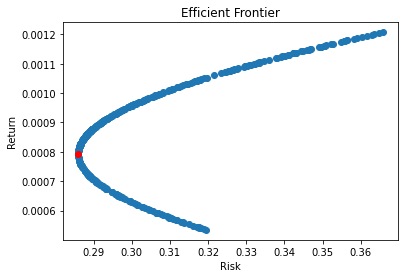

In [24]:
plt.scatter(stds,returns)
# plt.scatter(df.std().iloc[0]*np.sqrt(250),df.mean().iloc[0],c='k')
# plt.scatter(df.std().iloc[1]*np.sqrt(250),df.mean().iloc[1],c='yellow')
plt.scatter(min(stds),returns[stds.index(min(stds))],c='red')
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Return")
plt.show()

In [25]:
#minimum variance portfolio
returns[stds.index(min(stds))]

0.0007929523869660579

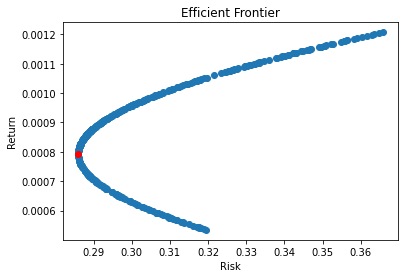

In [26]:
plt.scatter(stds,returns)
# plt.scatter(df.std().iloc[0]*np.sqrt(250),df.mean().iloc[0],c='k')
# plt.scatter(df.std().iloc[1]*np.sqrt(250),df.mean().iloc[1],c='yellow')
plt.scatter(min(stds),returns[stds.index(min(stds))],c='red')
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Return")
plt.show()